In [1]:
import pandas as pd
data = pd.read_csv("Fvote.csv",encoding='utf-8')
data.head()

,Unnamed: 0,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngman,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


In [2]:
data.describe()

,Unnamed: 0,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngman,edu,income,age,score_gov,score_progress,score_intention,vote,parties
count,211.00000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,105.00000,0.341232,0.658768,0.080569,0.090047,0.094787,0.597156,0.137441,1.867299,2.208531,2.654028,3.056872,3.094787,2.910900,0.710900,2.668246
std,61.05462,0.475251,0.475251,0.272819,0.286930,0.293617,0.491636,0.345131,0.625963,1.066424,0.872173,0.944451,0.961408,0.725078,0.454422,1.220416
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,52.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.400000,0.000000,2.000000
50%,105.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,157.50000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.400000,1.000000,4.000000
max,210.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'gender_female'}>,
        <AxesSubplot:title={'center':'gender_male'}>,
        <AxesSubplot:title={'center':'region_Chungcheung'}>],
       [<AxesSubplot:title={'center':'region_Honam'}>,
        <AxesSubplot:title={'center':'region_Others'}>,
        <AxesSubplot:title={'center':'region_Sudo'}>,
        <AxesSubplot:title={'center':'region_Youngman'}>],
       [<AxesSubplot:title={'center':'edu'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'score_gov'}>],
       [<AxesSubplot:title={'center':'score_progress'}>,
        <AxesSubplot:title={'center':'score_intention'}>,
        <AxesSubplot:title={'center':'vote'}>,
        <AxesSubplot:title={'center':'parties'}>]], dtype=object)

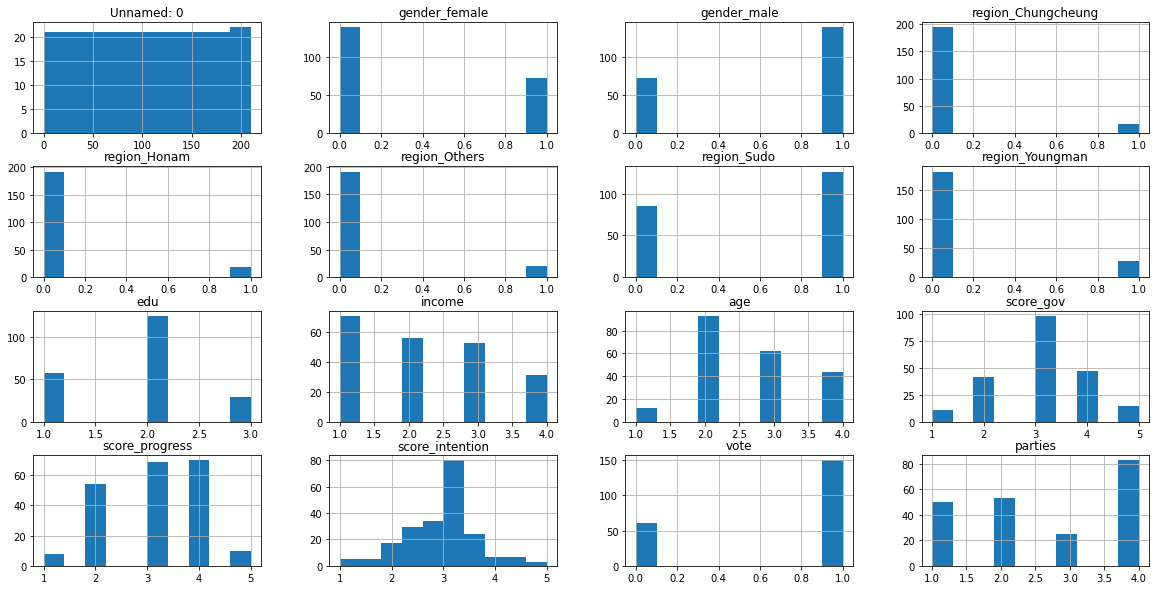

In [3]:
data.hist(figsize=(20,10))

#대부분 연속성이 떨어짐

In [4]:
#특성과 레이블 분할
X = data.loc[:,'gender_female':'score_intention']
y = data[['vote']]

In [5]:
print(X.shape)
print(y.shape)

(211, 13)
(211, 1)


In [6]:
#train/test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

In [7]:
print(y_train.mean())
print(y_test.mean())

vote    0.708861
dtype: float64
vote    0.716981
dtype: float64


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()

In [9]:
scaler_minmax.fit(X_train)
X_scaled_minmax_train = scaler_minmax.transform(X_train)

In [10]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.322785,0.677215,0.094937,0.056962,0.101266,0.601266,0.145570,0.436709,0.392405,0.554852,0.507911,0.518987,0.477532
std,0.469028,0.469028,0.294060,0.232507,0.302640,0.491195,0.353796,0.312857,0.355960,0.295306,0.235099,0.245248,0.187215
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.312500,0.250000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
X_scaled_minmax_test = scaler_minmax.transform(X_test)
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.396226,0.603774,0.037736,0.188679,0.075472,0.584906,0.113208,0.424528,0.433962,0.540881,0.533019,0.537736,0.478302
std,0.493793,0.493793,0.192380,0.394998,0.266679,0.497454,0.319878,0.316170,0.355572,0.279089,0.240381,0.226789,0.163939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.500000,0.500000,0.350000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.333333,0.666667,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.666667,0.666667,0.750000,0.750000,0.550000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000


In [13]:
#Standardization

from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()

scaler_standard.fit(X_train)
X_scaled_standard_train = scaler_standard.transform(X_train)

pd.DataFrame(X_scaled_standard_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02,1.580000e+02
mean,8.432074e-18,7.307797e-17,-2.810691e-17,1.127790e-16,-2.318820e-17,-1.405346e-18,-8.853677e-17,6.201087e-17,-8.151004e-17,-2.389088e-17,3.934968e-17,4.356571e-17,-4.863374e-16
std,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00,1.003180e+00
min,-6.903879e-01,-1.448461e+00,-3.238751e-01,-2.457696e-01,-3.356725e-01,-1.227981e+00,-4.127595e-01,-1.400312e+00,-1.105890e+00,-1.884881e+00,-2.167287e+00,-2.122900e+00,-2.558829e+00
25%,-6.903879e-01,-1.448461e+00,-3.238751e-01,-2.457696e-01,-3.356725e-01,-1.227981e+00,-4.127595e-01,-1.400312e+00,-1.105890e+00,-7.525190e-01,-8.338316e-01,-1.100283e+00,-6.833719e-01
50%,-6.903879e-01,6.903879e-01,-3.238751e-01,-2.457696e-01,-3.356725e-01,8.143451e-01,-4.127595e-01,2.029437e-01,-1.664780e-01,-1.863380e-01,-3.375836e-02,-7.766706e-02,1.203955e-01
75%,1.448461e+00,6.903879e-01,-3.238751e-01,-2.457696e-01,-3.356725e-01,8.143451e-01,-4.127595e-01,2.029437e-01,7.729337e-01,3.798429e-01,1.033006e+00,9.449492e-01,6.562405e-01
max,1.448461e+00,6.903879e-01,3.087610e+00,4.068852e+00,2.979094e+00,8.143451e-01,2.422719e+00,1.806199e+00,1.712345e+00,1.512205e+00,2.099770e+00,1.967565e+00,2.799620e+00


In [15]:
X_scaled_standard_test = scaler_standard.transform(X_test)
pd.DataFrame(X_scaled_standard_test).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.157080,-0.157080,-0.195140,0.568310,-0.085501,-0.033413,-0.091762,-0.039057,0.117118,-0.047463,0.107135,0.076690,0.004127
std,1.056149,1.056149,0.656302,1.704266,0.883978,1.015962,0.907008,1.013804,1.002085,0.948089,1.025719,0.927672,0.878457
min,-0.690388,-1.448461,-0.323875,-0.245770,-0.335673,-1.227981,-0.412759,-1.400312,-1.105890,-1.884881,-2.167287,-2.122900,-1.487139
25%,-0.690388,-1.448461,-0.323875,-0.245770,-0.335673,-1.227981,-0.412759,-1.400312,-1.105890,-0.752519,-0.033758,-0.077667,-0.683372
50%,-0.690388,0.690388,-0.323875,-0.245770,-0.335673,0.814345,-0.412759,0.202944,-0.166478,0.379843,-0.033758,-0.077667,0.120396
75%,1.448461,0.690388,-0.323875,-0.245770,-0.335673,0.814345,-0.412759,0.202944,0.772934,0.379843,1.033006,0.944949,0.388318
max,1.448461,0.690388,3.087610,4.068852,2.979094,0.814345,2.422719,1.806199,1.712345,1.512205,2.099770,1.967565,2.263775


In [16]:
#모델 학습
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [17]:
model.fit(X_scaled_minmax_train,y_train)
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train,y_train)

C:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7278481012658228

In [18]:
pred_test = model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test,y_test)

0.7169811320754716

In [19]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train,pred_train)
print("훈련데이터 오차행렬:\n",confusion_train)

훈련데이터 오차행렬:
 [[  9  37]
 [  6 106]]


In [20]:
confusion_test = confusion_matrix(y_test,pred_test)
print("테스트데이터 오차행렬:\n",confusion_test)

테스트데이터 오차행렬:
 [[ 2 13]
 [ 2 36]]


In [22]:
#표준화 방법 데이터 적용 결과 
model.fit(X_scaled_standard_train,y_train)
pred_train = model.predict(X_scaled_standard_train)
model.score(X_scaled_standard_train,y_train)

C:\Users\suhye\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.740506329113924

In [24]:
pred_test = model.predict(X_scaled_standard_test)
model.score(X_scaled_standard_test,y_test)

0.6792452830188679

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_train = confusion_matrix(y_train,pred_train)
print("훈련데이터의 오차행렬 : \n",confusion_train)

훈련데이터의 오차행렬 : 
 [[ 12  34]
 [  7 105]]


In [27]:
confusion_test = confusion_matrix(y_test,pred_test)
print("테스트데이터의 오차행렬 : \n",confusion_test)

테스트데이터의 오차행렬 : 
 [[ 3 12]
 [ 5 33]]
